In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()


('2017-08-23',)

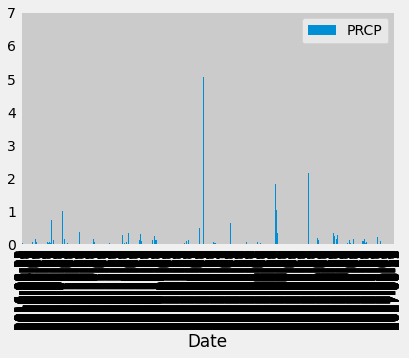

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
year_back_date = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

measurement_query = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_back_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
measurement_df = pd.DataFrame(measurement_query, columns = ['Date', 'PRCP']).sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data

measurement_df.plot(x="Date", y="PRCP", kind="bar")

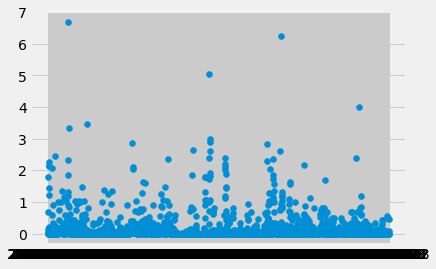

In [11]:
plt.scatter(measurement_df["Date"], measurement_df["PRCP"])
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df.describe()

,PRCP
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(station.station).order_by(station.station).count()
num_stations


9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.



#count = session.query(measurement).order_by(measurement.station).count()
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).all()
'''
Add an order by Count
Desc


'''


'\nAdd an order by Count\nDesc\n\n\n'

In [15]:
query = sqlalchemy.select([
measurement.station,
sqlalchemy.func.count(measurement.station)
]).group_by(measurement.station)

result = engine.execute(query).fetchall()

for i in result:
    print("\n", i)


 ('USC00511918', 1979)

 ('USC00513117', 2709)

 ('USC00514830', 2202)

 ('USC00516128', 2612)

 ('USC00517948', 1372)

 ('USC00518838', 511)

 ('USC00519281', 2772)

 ('USC00519397', 2724)

 ('USC00519523', 2669)


In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


#active Station = USC00519281
temps = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').all()
temp_list = []
for i in temps:
    temp_list.append(i)
temp_list
#max_temp = max(temp_list)
#min_temp = min(temp_list)
#average_temp = mean(temp_list)

print('FIX ME MIN/MAX TEMPS ARE FROM THE FULL TABLE NOT JUST STATION USC00519281')
max = session.query(func.max(measurement.tobs)).scalar()
min = session.query(func.min(measurement.tobs)).scalar()
avg = session.query(func.avg(measurement.tobs)).scalar()
print(max)
print(min)

FIX ME MIN/MAX TEMPS ARE FROM THE FULL TABLE NOT JUST STATION USC00519281
87.0
53.0


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_query = session.query(measurement.tobs, measurement.date).\
    filter(measurement.station == 'USC00519281', measurement.date >= year_back_date).all()

temp_df = pd.DataFrame(temp_query, columns = ['Temp', 'Date']).sort_values(by='Date')
#measurement_query = session.query(measurement.date, measurement.prcp).\
#    filter(measurement.date >= year_back_date).all()
# measurement_df = pd.DataFrame(measurement_query, columns = ['Date', 'PRCP']).sort_values(by='Date')


plt.hist(temp_df["Temp"], bins = 12)
plt.show()


# Close session

In [ ]:
# Close Session
session.close()